In [1]:
from re import I
from keras.layers import Dense, Flatten
from keras.models import Model
import tensorflow as tf

# vgg19
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt
from glob import glob



In [3]:

from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [6]:
device_list  = tf.test.gpu_device_name()
device_list

''

In [7]:

IMAGE_SIZE = [224,224]

trainImagesFolder = "/content/drive/MyDrive/Axial/train"
validationImagesFolder = "/content/drive/MyDrive/Axial/val"

# data augmentation

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                    shear_range = 0.4,
                                    zoom_range= 0.4,
                                    rotation_range=0.4,
                                    horizontal_flip= True)


valid_datagen = ImageDataGenerator( rescale= 1. / 255)


train_data_set = train_datagen.flow_from_directory(trainImagesFolder,
                                                    target_size=(224,224),
                                                    batch_size=32,
                                                    class_mode='categorical')

                                                    
valid_data_set = valid_datagen.flow_from_directory(validationImagesFolder,
                                                    target_size=(224,224),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 4123 images belonging to 3 classes.
Found 515 images belonging to 3 classes.


In [8]:
myVgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) 
# include_top=False -> remove the last fully connected layes from the VGG19 , so we can add our own layers

for layer in myVgg.layers:
    layer.trainable = False

80134624/80134624 [==============================] - 0s 0us/step


In [9]:

Classes = glob("/content/drive/MyDrive/Axial/train/*")
print(Classes)

classesNum = len(Classes)
print ('Number of Classes : ')
print(classesNum)

['/content/drive/MyDrive/Axial/train/AD', '/content/drive/MyDrive/Axial/train/CN', '/content/drive/MyDrive/Axial/train/CI']
Number of Classes : 
3


In [10]:

model = Sequential()
model.add(myVgg)
model.add(Flatten())
model.add(Dense(classesNum , activation='softmax'))

print (model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 3)                 75267     
                                                                 
Total params: 20,099,651
Trainable params: 75,267
Non-trainable params: 20,024,384
_________________________________________________________________
None


In [ ]:

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint , EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/MyDrive/h5model/trained.h5", 
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True)

earlystop = EarlyStopping(monitor='val_accuracy', patience=70 , verbose=1)                             

# fit the model (Training)
result = model.fit(train_data_set, validation_data= valid_data_set , epochs=100, verbose=1 , callbacks=[checkpoint,earlystop])



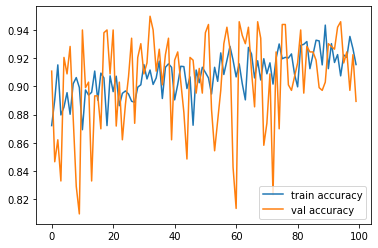

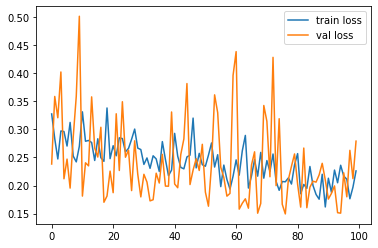

In [ ]:
# plot accuracy 
plt.plot(result.history['accuracy'], label='train accuracy')
plt.plot(result.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

# plot loss 
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [ ]:
import os

print(Classes)

['/content/drive/MyDrive/Axial/train/AD', '/content/drive/MyDrive/Axial/train/CN', '/content/drive/MyDrive/Axial/train/CI']


In [ ]:
testImagesFolder = "/content/drive/MyDrive/Axial/test"

test_datagen = ImageDataGenerator(rescale = 1./255)

test_data_set = test_datagen.flow_from_directory(testImagesFolder,
                                                    target_size=(224,224),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 516 images belonging to 3 classes.


In [ ]:
model.evaluate(test_data_set)

17/17 [==============================] - 94s 6s/step - loss: 0.2325 - accuracy: 0.9089


[0.2324894219636917, 0.9089147448539734]

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/Drive/MyDrive/h5model/trained.h5')

In [ ]:
model.evaluate(test_data_set)

17/17 [==============================] - 3s 169ms/step - loss: 0.1700 - accuracy: 0.9496


[0.1700362265110016, 0.9496123790740967]